   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

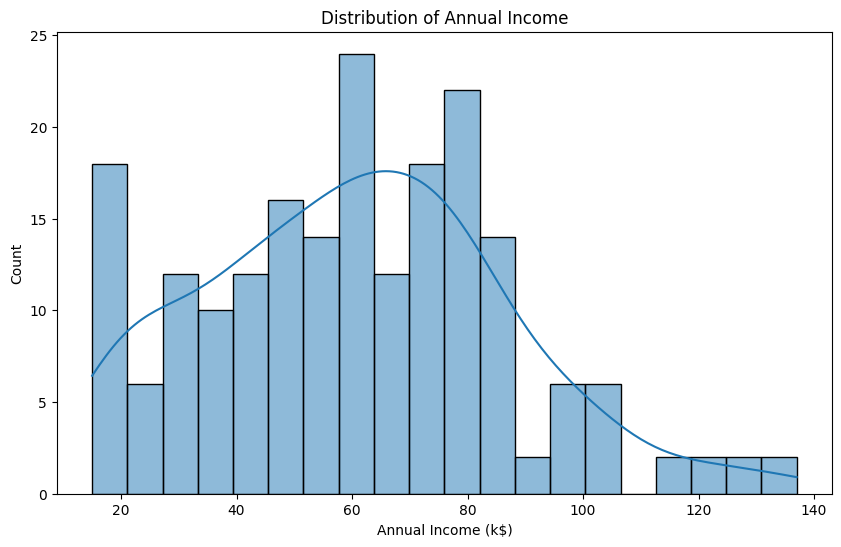

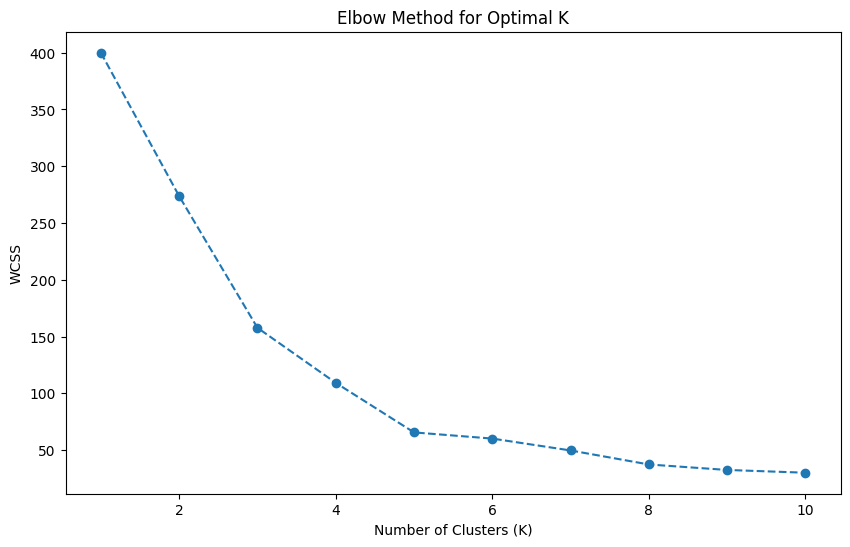

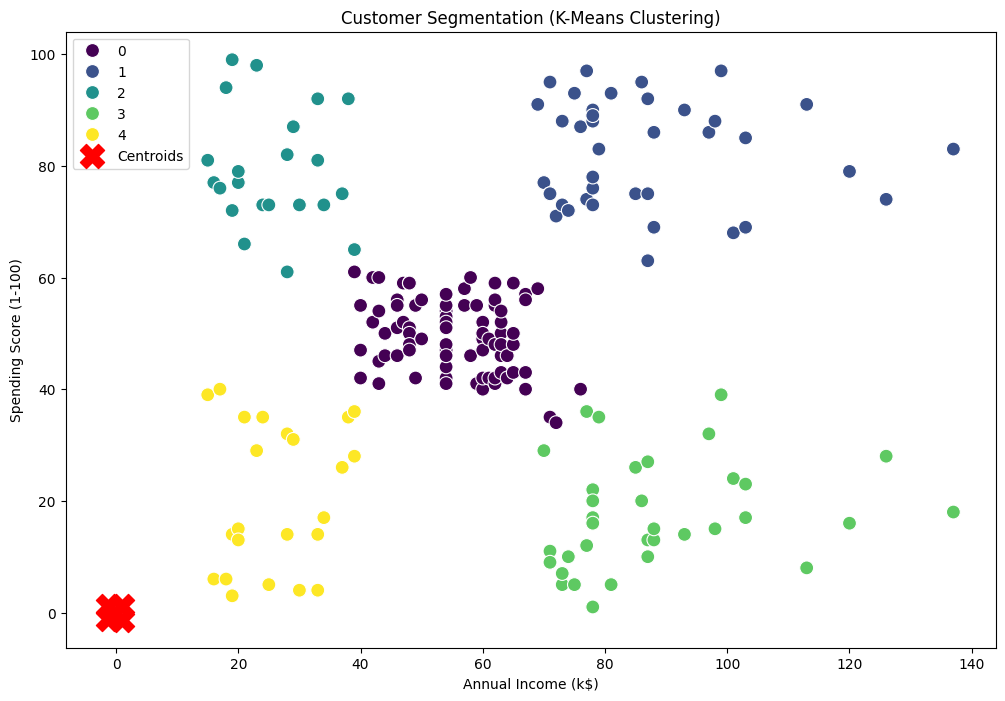

  Cluster Annual Income (k$)        Spending Score (1-100)               Age  \
                        mean median                   mean median       mean   
0       0          55.296296   54.0              49.518519   50.0  42.716049   
1       1          86.538462   79.0              82.128205   83.0  32.692308   
2       2          25.727273   24.5              79.363636   77.0  25.272727   
3       3          88.200000   85.0              17.114286   16.0  41.114286   
4       4          26.304348   25.0              20.913043   17.0  45.217391   

          
  median  
0   46.0  
1   32.0  
2   23.5  
3   42.0  
4   46.0  


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Mall_Customers.csv")  # Download from Kaggle link above
print(df.head())

# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Distribution of Annual Income")
plt.show()

# Select relevant features (Annual Income & Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal K using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with K=5 (optimal from the elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    label='Centroids',
    marker='X'
)
plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Analyze clusters (Business Insights)
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'median'],
    'Spending Score (1-100)': ['mean', 'median'],
    'Age': ['mean', 'median']
}).reset_index()
print(cluster_summary)